Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'LifeSave Dataset.csv')  # Load the Dataset

In [3]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
df.tail()

,State,Year,Type_code,Type,Gender,Age_group,Total
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189
237518,West Bengal,2012,Social_Status,Never Married,Male,0-100+,2658


In [5]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [6]:
df.shape

(237519, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [8]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [9]:
states_totals = df.groupby('State')['Total'].sum().reset_index()
print(states_totals)

                State    Total
0       A & N Islands     8109
1      Andhra Pradesh   814059
2   Arunachal Pradesh     6633
3               Assam   172276
4               Bihar    46214
5          Chandigarh     5164
6        Chhattisgarh   302354
7        D & N Haveli     3430
8         Daman & Diu     1391
9          Delhi (Ut)    84272
10                Goa    17363
11            Gujarat   330858
12            Haryana   147176
13   Himachal Pradesh    26562
14    Jammu & Kashmir    14821
15          Jharkhand    49720
16          Karnataka   734825
17             Kerala   538946
18        Lakshadweep       50
19     Madhya Pradesh   451535
20        Maharashtra   901945
21            Manipur     2102
22          Meghalaya     5415
23            Mizoram     4154
24           Nagaland     1728
25             Odisha   267234
26         Puducherry    32144
27             Punjab    46350
28          Rajasthan   255134
29             Sikkim     9606
30         Tamil Nadu   818691
31  Tota

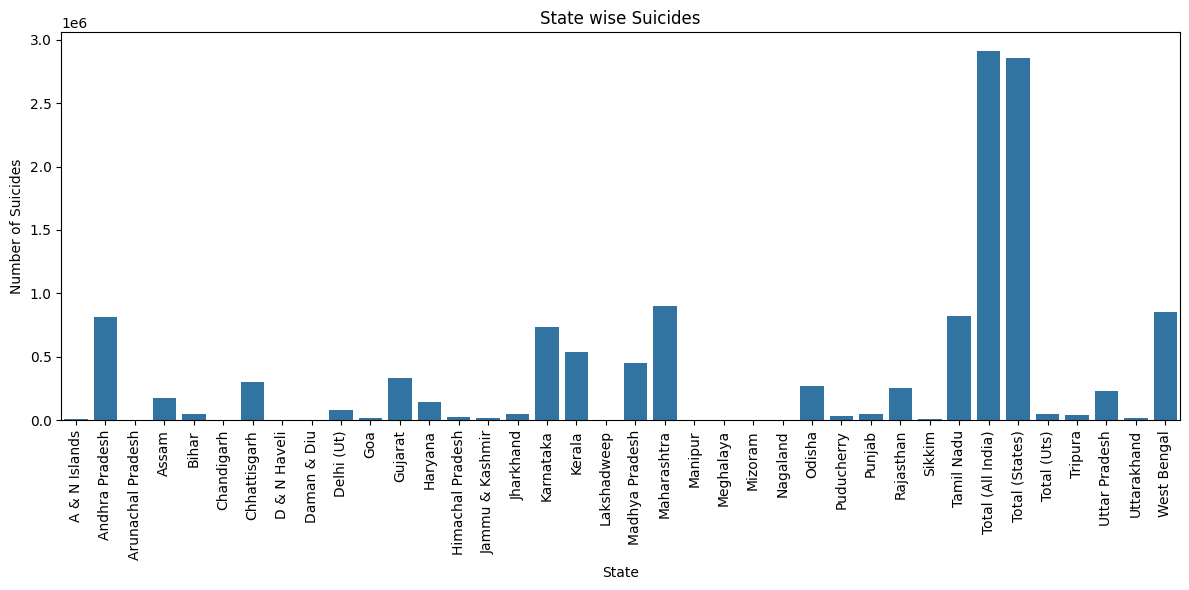

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=states_totals, x='State', y='Total')
plt.title('State wise Suicides')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
df.duplicated().sum()

0

In [12]:
yearly_totals = df.groupby('Year')['Total'].sum().reset_index()  
# Group by Year and sum the Total

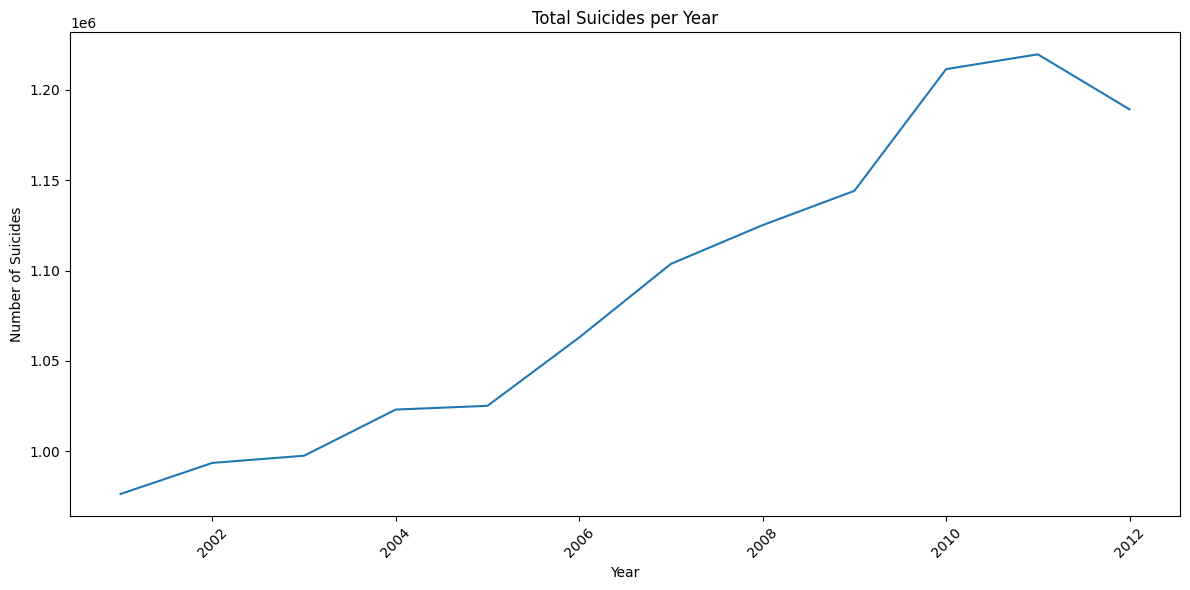

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_totals, x='Year', y='Total')
plt.title('Total Suicides per Year')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  # Create line charts

In [14]:
top_causes = df.groupby('Type')['Total'].sum().sort_values(ascending=False).head(10)
print(top_causes)

Type
Married                                     3065322
Primary                                     1088481
Middle                                      1028913
No Education                                 965271
Never Married                                954903
Matriculate/Secondary                        769698
Others (Please Specify)                      469147
By Hanging                                   460955
Hr. Secondary/Intermediate/Pre-Universit     356724
Family Problems                              341952
Name: Total, dtype: int64


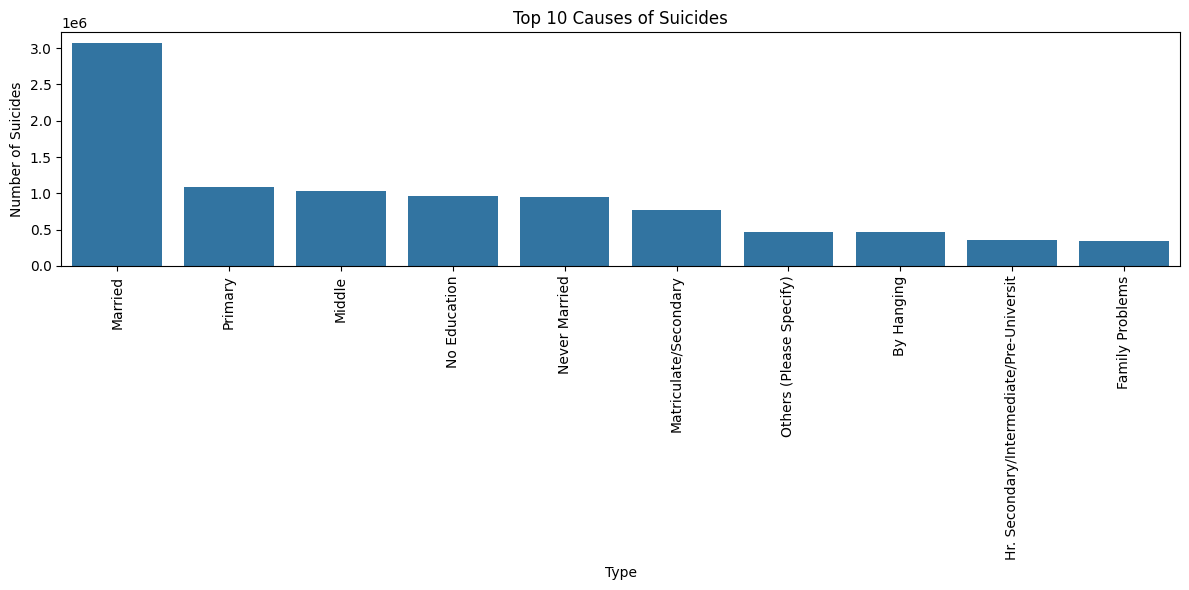

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_causes.index, y=top_causes.values)
plt.title('Top 10 Causes of Suicides')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
gender_distribution = df.groupby('Gender')['Total'].sum()
print(gender_distribution)

Gender
Female    4702974
Male      8368760
Name: Total, dtype: int64


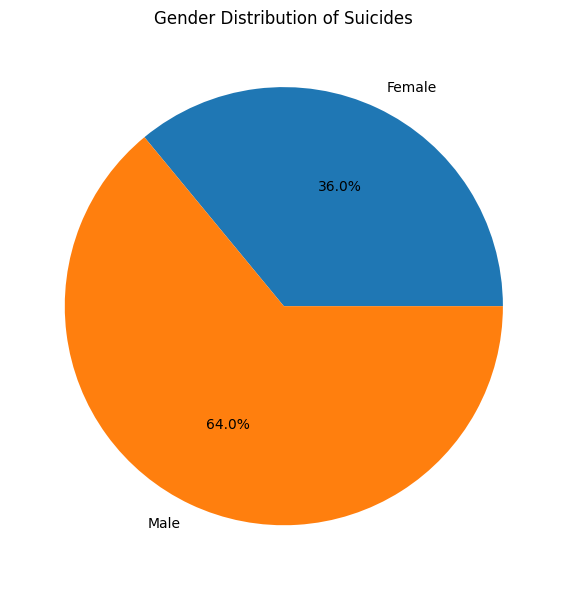

In [17]:
plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Suicides')
plt.ylabel('')
plt.tight_layout()